In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import reduce

# Data read

In [2]:
#read data file
df = pd.read_csv('../data/longitudinal/PreprocessedVisitsLong_new.csv')

print('Size of dataframe = ', df.shape)
df.head(5)

/home/kali/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (73,74) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Size of dataframe =  (140461, 97)


,PtID,Visit,ExamDtMnC,ageConsent,Pt_Gender,Pt_PumpManuf,Pt_PumpModel,Pt_CGMUseNumDays,Pt_InsPriv,Pt_InsSingleService,...,Pt_SmokeCurr,Pt_EduLevel,Pt_AnnualInc,NumPumpBolusOrShortActUnk,GFR,diagAgeCombo,Pt_A1cGoal,Pt_A1cGoalLev,Pt_A1cGoalLevelYr5,Pt_A1cGoalLevelDsYr5
0,1,Enrollment1,-1.959,42,F,Medtronic,Paradigm 712,26.0,1.0,0.0,...,No,4. Bachelor degree,"$100,000 - less than $200,000",1,NaN,8.0,NaN,NaN,NaN,NaN
1,1,Year 1,10.888,42,F,Medtronic,Paradigm 722,28.0,1.0,0.0,...,No,4. Bachelor degree,"$100,000 - less than $200,000",1,NaN,8.0,Yes,6.5,NaN,NaN
2,1,Annual,24.166,42,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,8.0,NaN,NaN,NaN,NaN
3,1,Annual,38.274,42,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,NaN,8.0,NaN,NaN,NaN,NaN
4,1,Year 5,67.120,42,F,Tandem,t:slim,30.0,1.0,0.0,...,No,4. Bachelor degree,"$100,000 - less than $200,000",1,NaN,8.0,Yes,NaN,< 7.0%,NaN


#### Count null value percentage in each column

<AxesSubplot:>

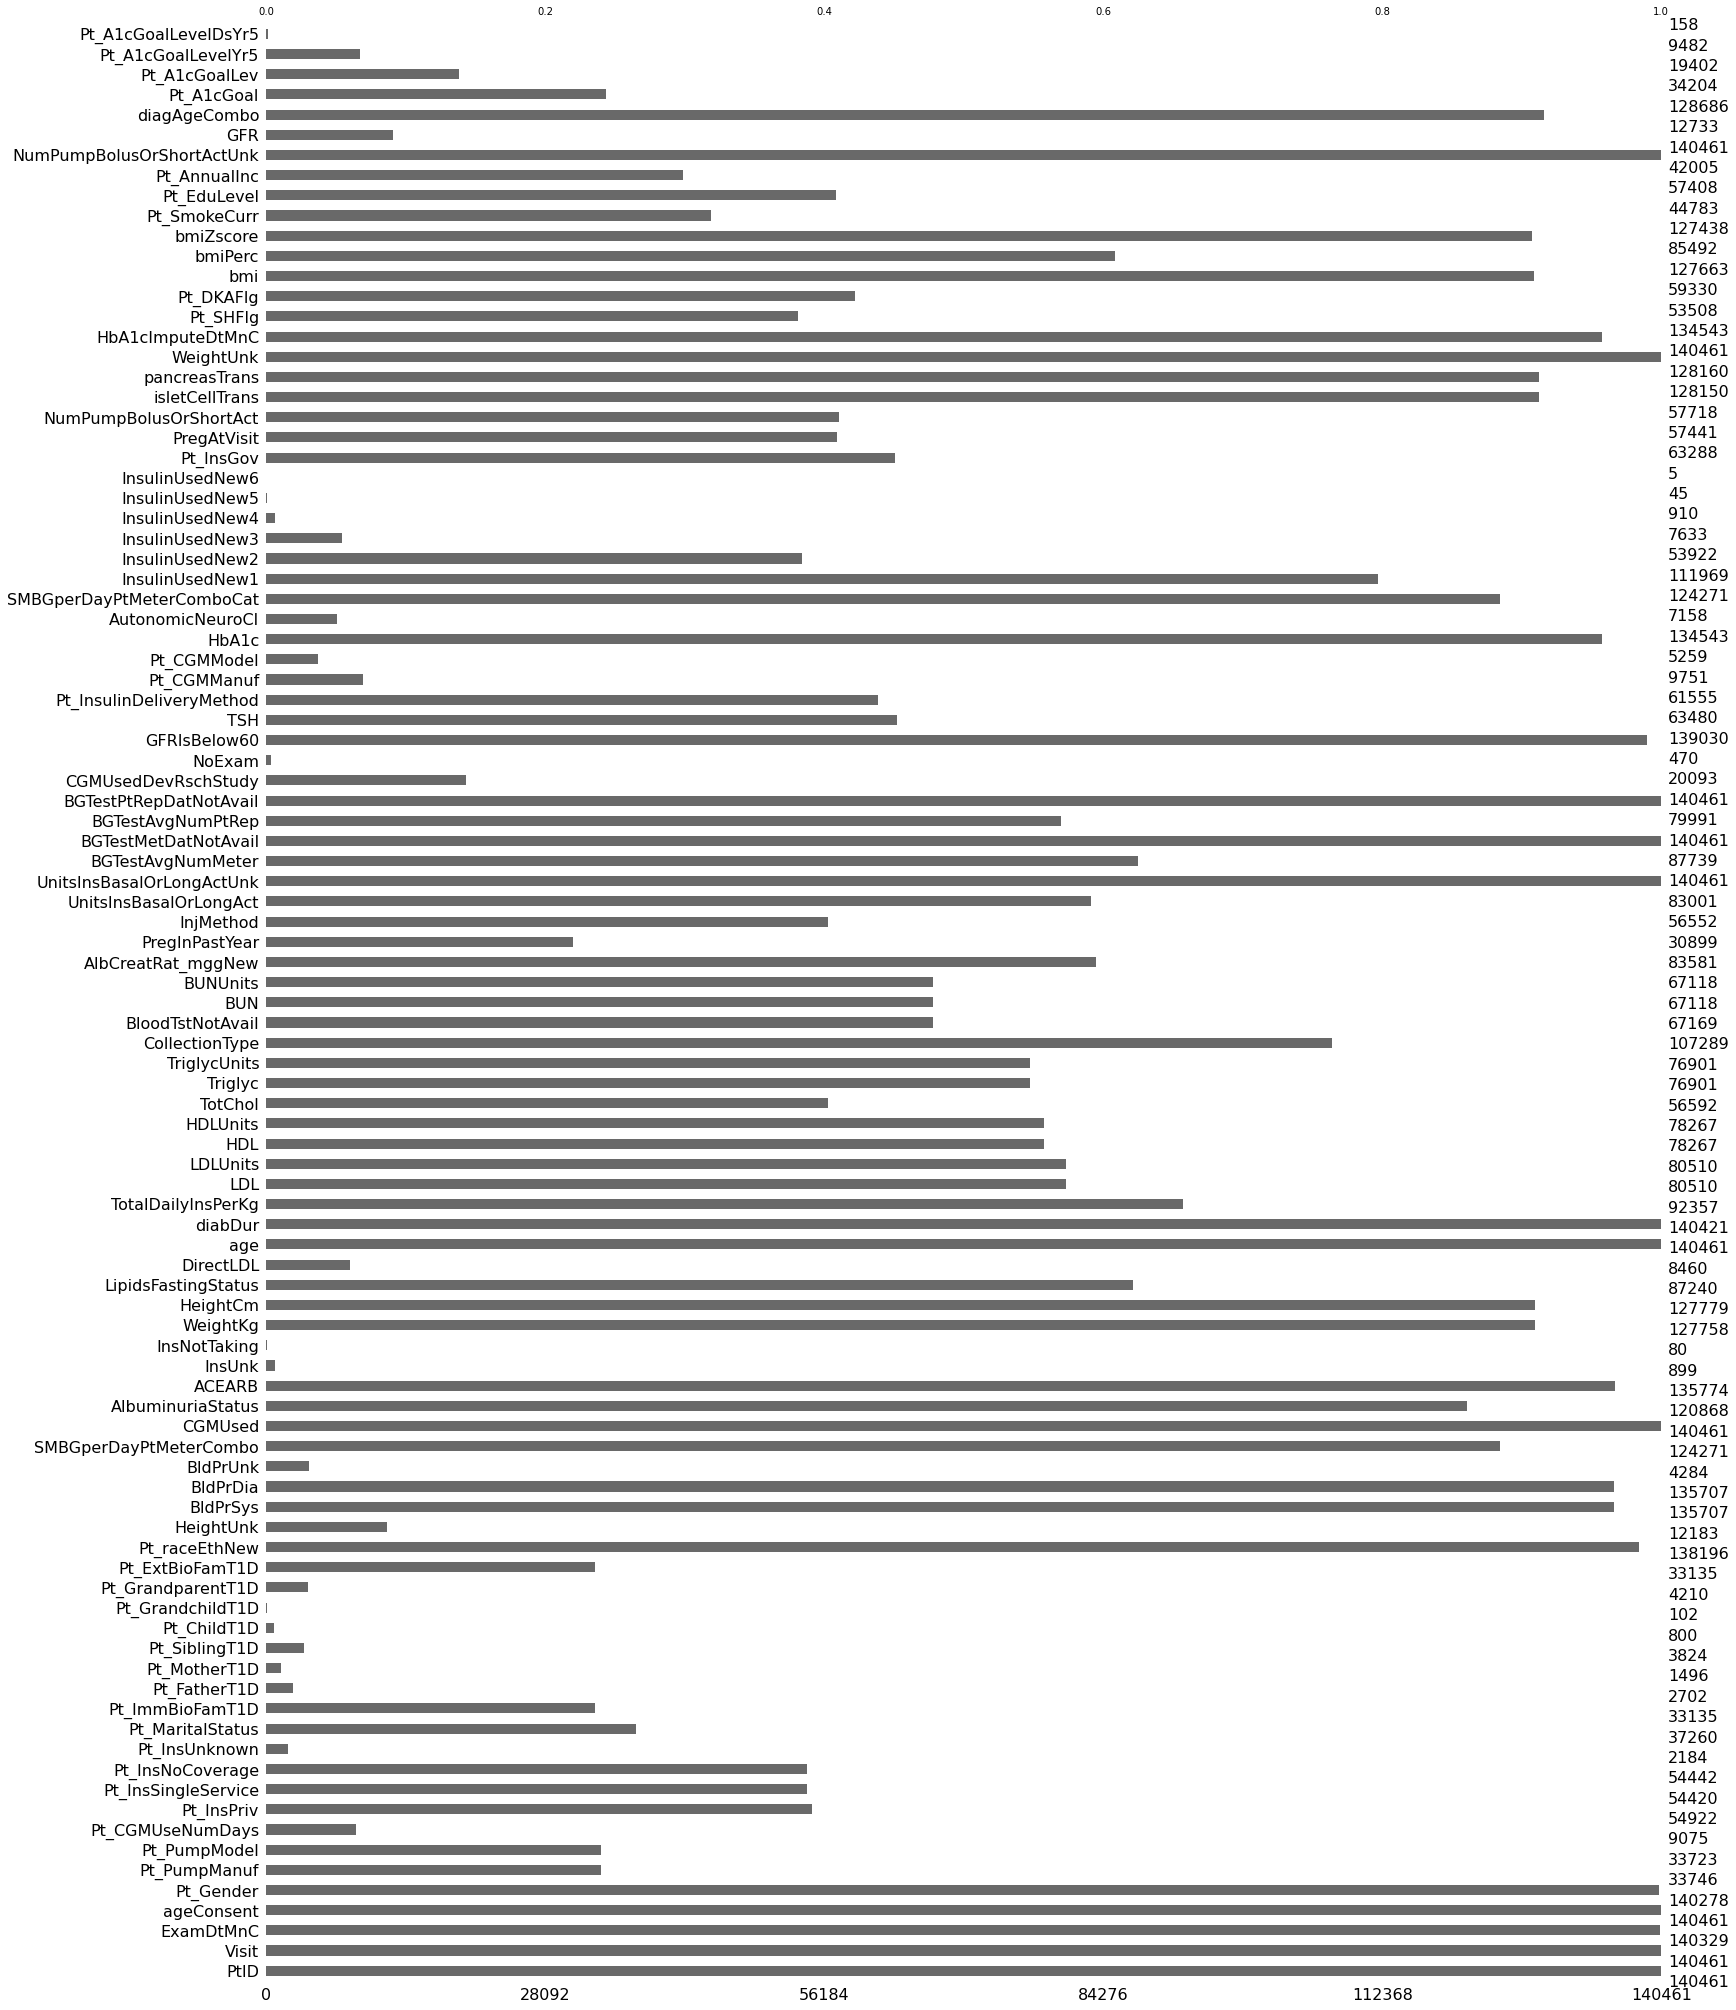

In [3]:
# missing values
import missingno as msno
msno.bar(df)

In [4]:
pd.options.display.max_rows = 100

def get_missing_val_percentage(df):
    return (df.isnull().sum()* 100 / len(df))


missing_per = get_missing_val_percentage(df)

# print(missing_per)

# get missing values < threshold feature name list
variables = df.columns
thresh = 60
variable = [ ]
var = []
for i in range(df.columns.shape[0]):
    if missing_per[i]<= thresh: #setting the threshold as 40%
        variable.append(variables[i])
    else :
        var.append(variables[i])
        
print("variables missing vals < threshold")     
print(variable)
print("Length: ", len(variable))


print()
print("variables missing vals > threshold")     
print(var)
print("Length: ", len(var))

variables missing vals < threshold
['PtID', 'Visit', 'ExamDtMnC', 'ageConsent', 'Pt_Gender', 'Pt_raceEthNew', 'BldPrSys', 'BldPrDia', 'SMBGperDayPtMeterCombo', 'CGMUsed', 'AlbuminuriaStatus', 'ACEARB', 'WeightKg', 'HeightCm', 'LipidsFastingStatus', 'age', 'diabDur', 'TotalDailyInsPerKg', 'LDL', 'LDLUnits', 'HDL', 'HDLUnits', 'TotChol', 'Triglyc', 'TriglycUnits', 'CollectionType', 'BloodTstNotAvail', 'BUN', 'BUNUnits', 'AlbCreatRat_mggNew', 'InjMethod', 'UnitsInsBasalOrLongAct', 'UnitsInsBasalOrLongActUnk', 'BGTestAvgNumMeter', 'BGTestMetDatNotAvail', 'BGTestAvgNumPtRep', 'BGTestPtRepDatNotAvail', 'GFRIsBelow60', 'TSH', 'Pt_InsulinDeliveryMethod', 'HbA1c', 'SMBGperDayPtMeterComboCat', 'InsulinUsedNew1', 'Pt_InsGov', 'PregAtVisit', 'NumPumpBolusOrShortAct', 'isletCellTrans', 'pancreasTrans', 'WeightUnk', 'HbA1cImputeDtMnC', 'Pt_DKAFlg', 'bmi', 'bmiPerc', 'bmiZscore', 'Pt_EduLevel', 'NumPumpBolusOrShortActUnk', 'diagAgeCombo']
Length:  57

variables missing vals > threshold
['Pt_PumpManuf

Drop columns that have high null value percentage

In [5]:
# Drop unwanted columns from longitudinal visit data - 
# remove HeightCm, weightkg since we have bmi data
#'LDLUnits', 'HDLUnits','BUNUnits', 'TriglycUnits' -  remove since all data converted to mg/dl - checked
# manually added some cols to delete like BloodTstNotAvail, UnitsInsBasalOrLongActUnk, BGTestMetDatNotAvail
cols_to_del = ['HeightUnk', 'WeightKg', 'HeightCm', 'age', 'LDLUnits', 'HDLUnits','BUNUnits', 'TriglycUnits',
               'CollectionType', 'NoExam', 'Pt_CGMManuf' , 'ExamDtMnC', 'BloodTstNotAvail', 'UnitsInsBasalOrLongActUnk',
               'InsulinUsedNew4', 'BGTestMetDatNotAvail',
               'WeightUnk', 'bmiPerc', 'bmiZscore', 
               'NumPumpBolusOrShortActUnk', 'Pt_InsUnknown', 'BldPrUnk', 'InsUnk', 'InsNotTaking', 
               'Pt_CGMModel', 'Pt_A1cGoalLevelDsYr5', 'CGMUsedDevRschStudy', 'Pt_A1cGoalLev', 
               'Pt_A1cGoalLevelYr5', 'Pt_A1cGoal', 'Pt_PumpManuf']

df.drop(cols_to_del, inplace=True, axis=1)
df.head(10)

,PtID,Visit,ageConsent,Pt_Gender,Pt_PumpModel,Pt_CGMUseNumDays,Pt_InsPriv,Pt_InsSingleService,Pt_InsNoCoverage,Pt_MaritalStatus,...,pancreasTrans,HbA1cImputeDtMnC,Pt_SHFlg,Pt_DKAFlg,bmi,Pt_SmokeCurr,Pt_EduLevel,Pt_AnnualInc,GFR,diagAgeCombo
0,1,Enrollment1,42,F,Paradigm 712,26.0,1.0,0.0,0.0,3.Married,...,No,-1.959,0.0,0.0,NaN,No,4. Bachelor degree,"$100,000 - less than $200,000",NaN,8.0
1,1,Year 1,42,F,Paradigm 722,28.0,1.0,0.0,0.0,3.Married,...,NaN,10.888,0.0,0.0,38.528652,No,4. Bachelor degree,"$100,000 - less than $200,000",NaN,8.0
2,1,Annual,42,F,NaN,NaN,NaN,NaN,NaN,NaN,...,No,24.166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
3,1,Annual,42,F,NaN,NaN,NaN,NaN,NaN,NaN,...,No,38.274,NaN,NaN,36.022723,NaN,NaN,NaN,NaN,8.0
4,1,Year 5,42,F,t:slim,30.0,1.0,0.0,0.0,3.Married,...,No,67.120,0.0,0.0,NaN,No,4. Bachelor degree,"$100,000 - less than $200,000",NaN,8.0
5,1,Annual,42,F,NaN,NaN,NaN,NaN,NaN,NaN,...,No,75.253,NaN,NaN,33.516794,NaN,NaN,NaN,NaN,8.0
6,10,Enrollment1,39,F,Revel723,25.0,1.0,0.0,0.0,3.Married,...,No,-0.432,0.0,0.0,NaN,No,3. Associate degree,NaN,NaN,10.0
7,10,Year 1,39,F,Revel523,NaN,1.0,0.0,0.0,3.Married,...,No,4.614,0.0,0.0,NaN,No,3. Associate degree,NaN,NaN,10.0
8,100,Enrollment1,64,M,Revel723,15.0,1.0,0.0,0.0,3.Married,...,No,-0.432,0.0,0.0,NaN,No,4. Bachelor degree,NaN,NaN,12.0
9,100,Year 1,64,M,Other,NaN,1.0,0.0,0.0,3.Married,...,No,22.705,0.0,0.0,NaN,No,4. Bachelor degree,"$35,000 - less than $50,000",NaN,12.0


# combine other medical conditions 

In [6]:
# read longitudinal medical condition data
df_med = pd.read_csv('../data/longitudinal/PreprocessedMedCondLong_new.csv')


In [7]:
# get id list of patients having specific medical condition

def get_ids_of_condition(df, label):
    df_a = df[df['MCPrefTerm'] == label]
    df_a=df_a.drop_duplicates(subset="PtID",keep="first") 
    return df_a.PtID.tolist()


In [8]:
# add anxiety, depression, Diabetic retinopathy, Diabetic neuropathy column

medical_conditions = ["Anxiety","Depression","Diabetic retinopathy","Diabetic neuropathy","Chronic kidney disease",
                     "Obesity", "Seizure"]

def add_column(df,df_med, medical_conditions):
    for label in medical_conditions:
        patients_list = get_ids_of_condition(df_med, label)
        print("Count of patients with ",label,len(patients_list))
        df[label] = df['PtID'].isin(patients_list)
        
        # rename column labels
        new_label = label.replace(" ", "_") if (' ' in label) else label
        df.rename(columns={label:new_label}, inplace=True)
    return df

df = add_column(df,df_med, medical_conditions)


Count of patients with  Anxiety 2038
Count of patients with  Depression 3817
Count of patients with  Diabetic retinopathy 2782
Count of patients with  Diabetic neuropathy 1911
Count of patients with  Chronic kidney disease 331
Count of patients with  Obesity 1133
Count of patients with  Seizure 185


In [9]:
df

,PtID,Visit,ageConsent,Pt_Gender,Pt_PumpModel,Pt_CGMUseNumDays,Pt_InsPriv,Pt_InsSingleService,Pt_InsNoCoverage,Pt_MaritalStatus,...,Pt_AnnualInc,GFR,diagAgeCombo,Anxiety,Depression,Diabetic_retinopathy,Diabetic_neuropathy,Chronic_kidney_disease,Obesity,Seizure
0,1,Enrollment1,42,F,Paradigm 712,26.0,1.0,0.0,0.0,3.Married,...,"$100,000 - less than $200,000",NaN,8.0,False,False,True,False,False,False,False
1,1,Year 1,42,F,Paradigm 722,28.0,1.0,0.0,0.0,3.Married,...,"$100,000 - less than $200,000",NaN,8.0,False,False,True,False,False,False,False
2,1,Annual,42,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.0,False,False,True,False,False,False,False
3,1,Annual,42,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.0,False,False,True,False,False,False,False
4,1,Year 5,42,F,t:slim,30.0,1.0,0.0,0.0,3.Married,...,"$100,000 - less than $200,000",NaN,8.0,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140456,9998,Annual,13,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,False,True,True,False,False,False,False
140457,9999,Enrollment1,11,F,Paradigm 522,NaN,1.0,0.0,0.0,NaN,...,"$200,000 or more",NaN,6.0,False,False,False,False,False,False,False
140458,9999,Year 1,11,F,Revel523,NaN,1.0,0.0,0.0,NaN,...,"$200,000 or more",NaN,6.0,False,False,False,False,False,False,False
140459,9999,Annual,11,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.0,False,False,False,False,False,False,False


# Convert variables - categories

Boolean data columns

In [10]:
# boolean values to 1,0
bool_list = ['Anxiety','Depression','Diabetic_retinopathy', 'Diabetic_neuropathy','Chronic_kidney_disease', "Obesity", "Seizure"]

def convert_bool(df, bool_list):
    for label in bool_list:
        df[label] = df[label].astype(int)
    return df

convert_bool(df, bool_list)

,PtID,Visit,ageConsent,Pt_Gender,Pt_PumpModel,Pt_CGMUseNumDays,Pt_InsPriv,Pt_InsSingleService,Pt_InsNoCoverage,Pt_MaritalStatus,...,Pt_AnnualInc,GFR,diagAgeCombo,Anxiety,Depression,Diabetic_retinopathy,Diabetic_neuropathy,Chronic_kidney_disease,Obesity,Seizure
0,1,Enrollment1,42,F,Paradigm 712,26.0,1.0,0.0,0.0,3.Married,...,"$100,000 - less than $200,000",NaN,8.0,0,0,1,0,0,0,0
1,1,Year 1,42,F,Paradigm 722,28.0,1.0,0.0,0.0,3.Married,...,"$100,000 - less than $200,000",NaN,8.0,0,0,1,0,0,0,0
2,1,Annual,42,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.0,0,0,1,0,0,0,0
3,1,Annual,42,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.0,0,0,1,0,0,0,0
4,1,Year 5,42,F,t:slim,30.0,1.0,0.0,0.0,3.Married,...,"$100,000 - less than $200,000",NaN,8.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140456,9998,Annual,13,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0,1,1,0,0,0,0
140457,9999,Enrollment1,11,F,Paradigm 522,NaN,1.0,0.0,0.0,NaN,...,"$200,000 or more",NaN,6.0,0,0,0,0,0,0,0
140458,9999,Year 1,11,F,Revel523,NaN,1.0,0.0,0.0,NaN,...,"$200,000 or more",NaN,6.0,0,0,0,0,0,0,0
140459,9999,Annual,11,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.0,0,0,0,0,0,0,0


## Object data type handle

In [11]:
# get possible values in column
def get_possible_vals(df, colName):
    list_val =df[colName].unique().tolist() 
    without_nan = [x for x in list_val if str(x) != 'nan']
    without_nan.sort()
    return without_nan


# get possible values in column including nan
def get_possible_vals_with_nan(df, colName):
    list_val =df[colName].unique().tolist()
    return list_val

In [12]:
# get parameter list with object type

obj_col_name_list = list(df.select_dtypes(['object']).columns)


In [13]:
# check parameters have common vatiables - ex 1. yes, yes etc

for i in obj_col_name_list:
    print(i , get_possible_vals_with_nan(df,i))
    print()
    print()


Visit ['Enrollment1', 'Year 1', 'Annual', 'Year 5', 'Enrollment2']


Pt_Gender ['F', 'M', nan, 'T']


Pt_PumpModel ['Paradigm 712', 'Paradigm 722', nan, 't:slim', 'Revel723', 'Revel523', 'Other', 'One touch ping', 'DK', 'Paradigm 512', 'OmniPod Insulin Management System', 'MiniMed 530G', 'MiniMed 630G', 'Paradigm 522', 'Cozmo', 'Paradigm 515', '2020', 'Vibe', 'Paradigm 715', 'Revel 723', 'MiniMed 670G', 'Revel 523', 'IR1250', 'Spirit', '507C', '507', 'IR1200', 'Accu-Chek Combo', 'H-Tron Plus', 'Diabecare II', 'IR1000', 'Snap']


Pt_MaritalStatus ['3.Married', nan, '1.Single (never married)', '2.Living together', '5.Divorced', '6.Widowed', '4.Separated', '7.Other', '8.Do not wish to provide']


Pt_ImmBioFamT1D ['2.No', nan, '1.Yes', "3.Don't know", 'No', 'Yes', 'DK']


Pt_ExtBioFamT1D ['2.No', nan, '1.Yes', "3.Don't know", 'DK', 'No', 'Yes']


Pt_raceEthNew ['White Non-Hispanic', 'Black Non-Hispanic', nan, 'American Indian/Alaskan Native', 'Native Hawaiian/Other Pacific Islander', 'Hisp

In [14]:
# remove Pt_ImmBioFamT1D and  Pt_ExtBioFamT1D , PregAtVisit because their values need to handle manually
name_list = ['Pt_ImmBioFamT1D', 'Pt_ExtBioFamT1D', 'PregAtVisit' ]

for l in name_list:
    obj_col_name_list.remove(l)


In [15]:
def swap_dict_vals_keys(d):
    dicts = {value:key for key, value in d.items()}
    return dicts


def create_unique_val_dict_and_replace(df, label):
    dicts = {}
    values = get_possible_vals(df, label)
    keys = range(len(values))
    
    for i in keys:
        dicts[i] = values[i]
    
    d = swap_dict_vals_keys(dicts)
#     print(label   ,d)
#     print()
    df[label] = df[label].replace(d)

    return df

for i in obj_col_name_list:
    df = create_unique_val_dict_and_replace (df, i)


In [16]:
df

,PtID,Visit,ageConsent,Pt_Gender,Pt_PumpModel,Pt_CGMUseNumDays,Pt_InsPriv,Pt_InsSingleService,Pt_InsNoCoverage,Pt_MaritalStatus,...,Pt_AnnualInc,GFR,diagAgeCombo,Anxiety,Depression,Diabetic_retinopathy,Diabetic_neuropathy,Chronic_kidney_disease,Obesity,Seizure
0,1,1,42,0.0,20.0,26.0,1.0,0.0,0.0,2.0,...,0.0,NaN,8.0,0,0,1,0,0,0,0
1,1,3,42,0.0,22.0,28.0,1.0,0.0,0.0,2.0,...,0.0,NaN,8.0,0,0,1,0,0,0,0
2,1,0,42,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.0,0,0,1,0,0,0,0
3,1,0,42,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.0,0,0,1,0,0,0,0
4,1,4,42,0.0,30.0,30.0,1.0,0.0,0.0,2.0,...,0.0,NaN,8.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140456,9998,0,13,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0,1,1,0,0,0,0
140457,9999,1,11,0.0,19.0,NaN,1.0,0.0,0.0,NaN,...,2.0,NaN,6.0,0,0,0,0,0,0,0
140458,9999,3,11,0.0,25.0,NaN,1.0,0.0,0.0,NaN,...,2.0,NaN,6.0,0,0,0,0,0,0,0
140459,9999,0,11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.0,0,0,0,0,0,0,0


In [17]:
labels = []

In [18]:
# PregAtVisit feature
# 'No': 0, 
# 'Unknown': 1, 
# 'Yes': 2,
# 'DK': 1,
# 'Do not wish to answe': 3

label = 'PregAtVisit'
print(get_possible_vals(df,label))
df[label] = df[label].replace({'No': 0, 
                               'Unknown': 1, 
                               'Yes': 2,
                              'DK': 1,
                              'Do not wish to answe': 3})


['DK', 'Do not wish to answe', 'No', 'Unknown', 'Yes']


In [19]:

# Pt_ImmBioFamT1D feature and Pt_ExtBioFamT1D has common mapping
# 0 - 2.No, No
# 1 - 1.Yes, Yes
# 2 - 3.Don't know, DK

labels = ['Pt_ImmBioFamT1D', 'Pt_ExtBioFamT1D']

for label in labels:
    print(get_possible_vals(df,label))
    df[label] = df[label].replace({'2.No': 0, 
                               'No': 0, 
                               '1.Yes': 1,
                              'Yes': 1,
                              '3.Don\'t know': 2,
                              'DK': 2})

['1.Yes', '2.No', "3.Don't know", 'DK', 'No', 'Yes']
['1.Yes', '2.No', "3.Don't know", 'DK', 'No', 'Yes']


In [20]:
# check for missed object column types
check_obj_col_type = list(df.select_dtypes(['object']).columns)
check_obj_col_type

[]

# Divide dataset

In [21]:
def divide_data(df,label):
    Y = df[label]
    X = df.drop(label, axis=1)
    return X, Y


X, Y = divide_data(df, 'Depression')

## Correlation

In [22]:
# Correlation
X = pd.DataFrame(X)
corr = X.corr(method ='pearson')

corr = X.corr(method ='pearson').abs()
# avg_corr = corr.mean(axis = 1)


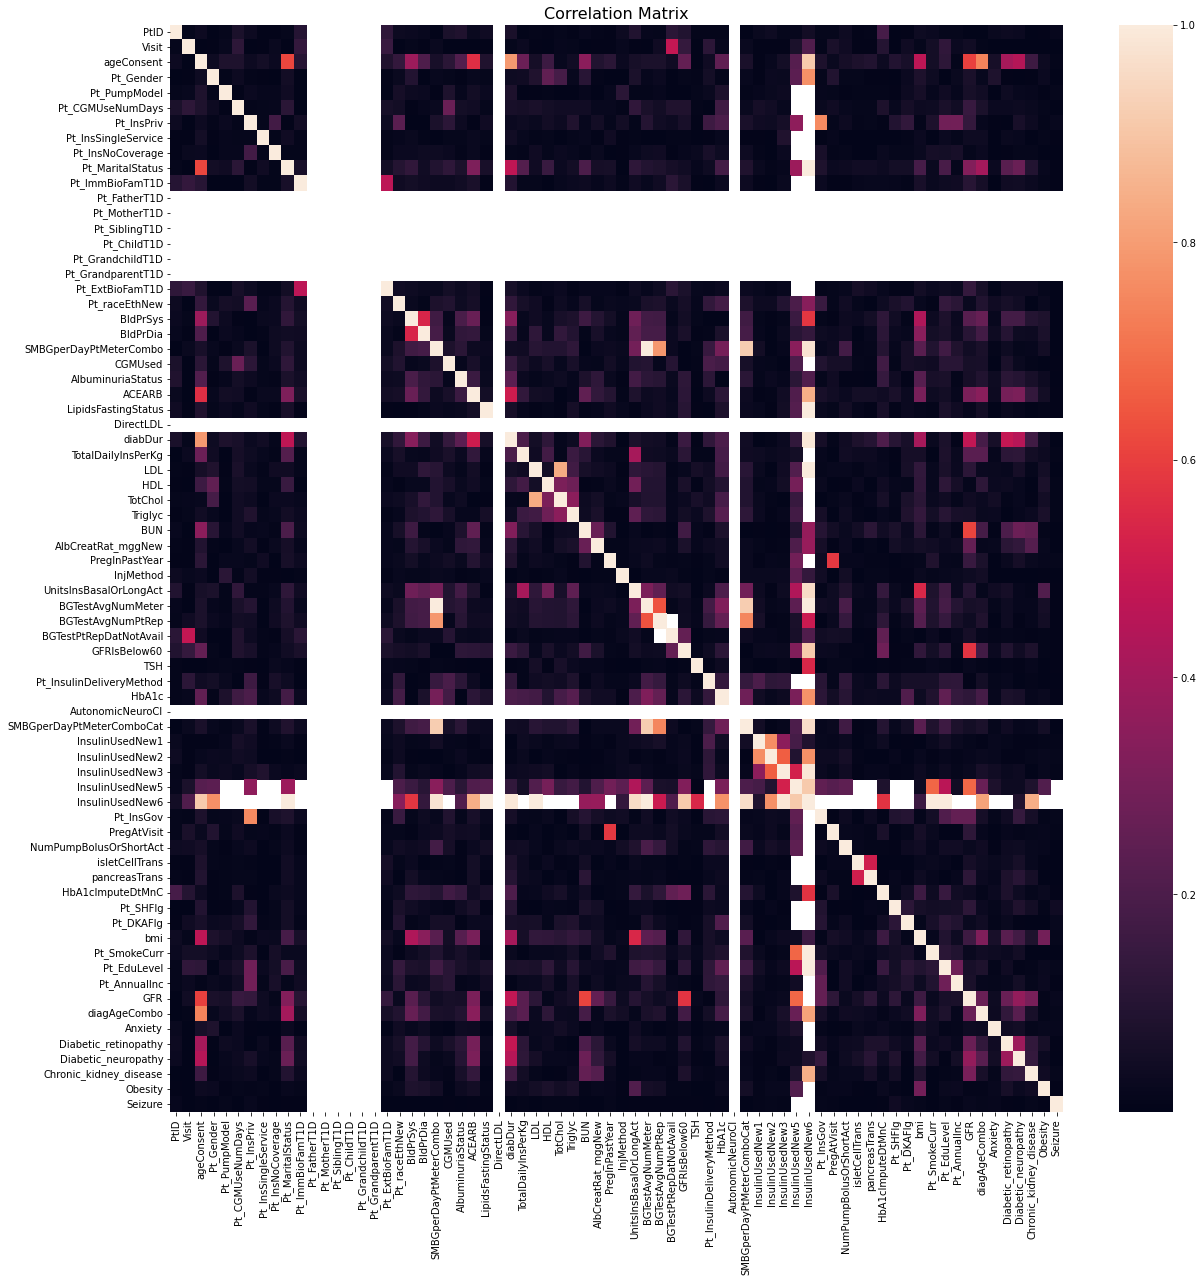

In [23]:
import seaborn as sn
plt.figure(figsize=(20,20))

sn.heatmap(corr,annot=False)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# Feature Selection

In [24]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import confusion_matrix, classification_report, f1_score, auc, roc_curve, roc_auc_score, precision_score, recall_score, balanced_accuracy_score


In [25]:
shape = np.shape(X) #(140461, 68)
feature = shape[1] # 68 features
n_classes = 2


In [26]:

# fill with 0 - if data not available probably patient has not that medical condition
Y = Y.fillna(0)

# these are possible colms to replace nan with 0 by assuming if patient miss the field to fill then he/she probably dont have the condition
cols_to_replace_nan_0 = ['Pt_ImmBioFamT1D', 'Pt_FatherT1D', 'Pt_MotherT1D', 'Pt_SiblingT1D', 'Pt_ChildT1D',
                         'Pt_GrandchildT1D','Pt_GrandparentT1D', 'Pt_ExtBioFamT1D', 'Pt_SmokeCurr', 'Pt_DKAFlg']
def fill_nan_with_0(df, list):
    for l in list:
        X[l] = X[l].fillna(0)
    return X

X = fill_nan_with_0(X, cols_to_replace_nan_0)

# check Y has nan values
# Y[Y.isnull() == True]


In [27]:
from numpy.random import seed
from sklearn.model_selection import train_test_split
seed(42)
import tensorflow as tf
tf.random.set_seed(38)
from sklearn.impute import SimpleImputer, KNNImputer

# Save original data set
original_X = X

# Split into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y) # if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)


2021-11-27 03:25:55.756119: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-27 03:25:55.756142: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


90.07859665109922
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     30734
           1       0.79      0.28      0.41      4382

    accuracy                           0.90     35116
   macro avg       0.85      0.63      0.68     35116
weighted avg       0.89      0.90      0.88     35116



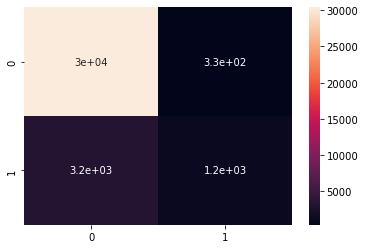

In [28]:
# xgboost - train with missing values
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model=XGBClassifier(use_label_encoder=False, eta = 0.1,#eta between(0.01-0.2)
        max_depth = 9, #values between(3-10)
        max_delta_step = 1,
        subsample = 0.7,#values between(0.5-1)
        colsample_bytree = 0.7,#values between(0.5-1)
        tree_method = "auto",
        process_type = "default",
        num_parallel_tree=3,
        objective='multi:softmax',
        min_child_weight = 3,
        booster='gbtree',
        eval_metric = "mlogloss",
        num_class = n_classes)
model.fit(X_train,Y_train)

xgb_pred=model.predict(X_test)
print(accuracy_score(Y_test, xgb_pred)*100)

confusion_matrix_xgb = pd.DataFrame(confusion_matrix(Y_test, xgb_pred))
sns.heatmap(confusion_matrix_xgb, annot=True)
print(classification_report(Y_test, xgb_pred))

In [29]:
Train = X_train.copy()

Train.loc[:,'Pt_SHFlg'] = Y_train

datasets= {}
by_class = Train.groupby('Pt_SHFlg')
for groups, data in by_class:
    datasets[groups] = data


X_train_0 = datasets[0][datasets[0].columns.difference(['Pt_SHFlg'])]
Y_train_0 = datasets[0].loc[:,'Pt_SHFlg'].copy()
X_train_1 = datasets[1][datasets[1].columns.difference(['Pt_SHFlg'])]
Y_train_1 = datasets[1].loc[:,'Pt_SHFlg'].copy()

# fill nan values in categorical dataset with frequent value

impute_0 = SimpleImputer(missing_values=np.nan, strategy = "most_frequent")
X_train_0 = impute_0.fit_transform(X_train_0)

impute_1 = SimpleImputer(missing_values=np.nan, strategy = "most_frequent")
X_train_1 = impute_1.fit_transform(X_train_1)

X_train = np.concatenate((X_train_0,X_train_1))
Y_train = np.concatenate((Y_train_0,Y_train_1))


In [30]:
# test data imputation

impute = SimpleImputer(missing_values=np.nan, strategy = "median")
impute.fit_transform(X_train)


Test = X_test.copy()
Test.loc[:,'Pt_SHFlg'] = Y_test

X_test = impute.transform(X_test)


ValueError: X has 72 features, but SimpleImputer is expecting 71 features as input.

In [ ]:
# Normalize numeric features
# scaler = StandardScaler()
scaler = MinMaxScaler()
select = {}
select[0] = pd.DataFrame(scaler.fit_transform(X_train))
select[1] = Y_train
select[2] = pd.DataFrame(scaler.transform(X_test))

In [ ]:
# TODO

def select_features(select, feature):
    selected = {}
    fs = SelectKBest(score_func=mutual_info_classif, k=feature)
    selected[0] = fs.fit_transform(select[0], select[1])
    selected[1] = fs.transform(select[2])
        
    idx = fs.get_support(indices=True)
    
    return selected, fs, idx

In [ ]:
# Feature selection
selected, fs, idx = select_features(select, feature)
X_train = pd.DataFrame(selected[0])
X_test = pd.DataFrame(selected[1])

In [ ]:
# Get columns to keep and create new dataframe with those only
from pprint import pprint
cols = fs.get_support(indices=True)
features_df_new = original_X.iloc[:,cols]
pprint(features_df_new.columns)
print(features_df_new.shape)

In [ ]:
#  random forest classifier
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier


model=KNeighborsClassifier(n_neighbors=3)


model.fit(X_train,Y_train)

pred=model.predict(X_test)
print(accuracy_score(Y_test, pred)*100)

confusion_matrix = pd.DataFrame(confusion_matrix(Y_test, pred))
sns.heatmap(confusion_matrix, annot=True)
print(classification_report(Y_test, pred))

#  calculations

In [ ]:
# get the patients count - filtering age
def get_count_by_age(df, age):
    age_df = df[df['ageConsent'] >= age]
    
    age_df=age_df.drop_duplicates(subset="PtID",keep="first") 
    print(f'Age {age}+ patient count  is -> {age_df.PtID.size}')


get_count_by_age(df, 26)


In [ ]:
# get the patients count - filtering age and diabetics duration

def get_count_by_age_diabDur(df, age, diabDur):
    filter_patients = df[(df["ageConsent"]>=age) & (df["diabDur"]>diabDur)] 
    
    filter_patients=filter_patients.drop_duplicates(subset="PtID",keep="first") 
    print(f'Number of patients whos age is {age}+ and diabetics duration greater than {diabDur}  is -> {filter_patients.PtID.size}')
    
get_count_by_age_diabDur(df, 26, 2)

In [ ]:

def get_occurence_count(df, label, num):
    data = df[(df[label]==num)] 
    data=data.drop_duplicates(subset="PtID",keep="first") 
    print(f'Number of patients who have {label}  is -> {data.PtID.size}')
    
get_occurence_count(df, 'Pt_DKAFlg',1)
get_occurence_count(df, 'Pt_SHFlg',1)

In [ ]:
def get_mean(df, label):
    mean = df[label].mean(axis = 0, skipna = True) # skip Na values
    return mean

def get_std(df, label):
    std = df[label].std(axis = 0, skipna = True) # skip Na values
    return std

mean = get_mean(df, 'HbA1c')
print(mean)

std = get_std(df, 'HbA1c')
print(std)

In [ ]:
# add new columns to df. number of dka, sh occurrences per person during 2010 to 2018
df['sh_events'] = df['Pt_SHFlg'].groupby(df['PtID']).transform('sum')

df['dka_events'] = df['Pt_DKAFlg'].groupby(df['PtID']).transform('sum')

get_occurence_count(df, 'sh_events',1)